# Signalverarbeitung - Praktikum 5

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.hrz.tu-chemnitz.de%2Fjs68viga--tu-freiberg.de%2Fsignalverarbeitung-ss23/HEAD?labpath=%2FP-5%2FSigProc_Praktikum05.ipynb)

Herzlich willkommen zum fünften Praktikum der Lehrveranstaltung "Signalverarbeitung" im Sommersemester 2023!

In diesem Praktikum geht es um die Zusammenhänge zwischen Zeit- und Frequenzbereich, Aliasing und den Leck-Effekt sowie um Signalrekonstruktion.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy import signal


# Aufgabe 1
Durch die folgende Funktion wird die Abtastung eines zeitkontinuierlichen Sinus-Signals mit einer Frequenz von 20 Hz zu den Zeitpunkten t beschreiben.

In [51]:
def get_discrete_signal(t, f=20):
    x = np.sin(2 * np.pi * f * t)  # t in s, f in Hz
    return x

Für hohe Abtastraten entspricht das Signal in guter Näherung dem zeitkontinuierlichen Signal:

In [52]:
f_samp_org = 4000;

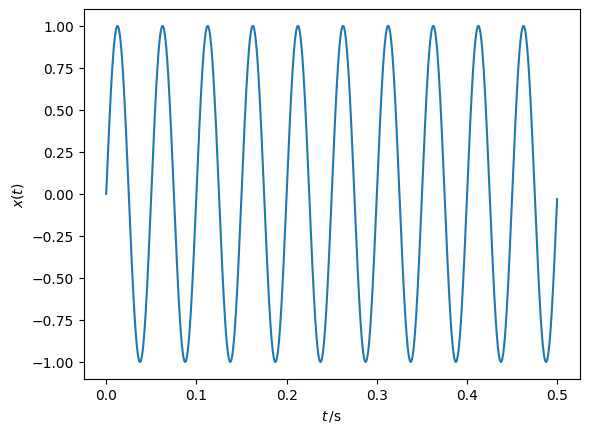

In [53]:
f_samp = f_samp_org;
t = np.arange(0, 0.5, 1 / f_samp)  # Abtast-Intervall definieren
x = get_discrete_signal(t)
plt.plot(t, x)
plt.xlabel("$t \, / \\rm{s}$")
plt.ylabel("$x(t)$")
plt.show()


a) Abtasten des Signals

Diskretisieren Sie das zeitkontinuierliche Sinus-Signal mit Hilfe der gegebenen Funktion in dem Zeitinterval von 0 bis 0.6 Sekunden mit den folgenden Abtastraten. Stellen Sie die Ergebnisse in einem Diagramm dar, welches die abgetasteten Werte und das (näherungsweise) zeitkontinuierliche Signal zeigt.  
* 35 Hz
* 41 Hz
* 64 Hz

In [54]:
def plot_discrete(f_samp: int, stop: float, color: str) -> np.ndarray:
    t = np.arange(0, stop, 1 / f_samp)
    x = get_discrete_signal(t)
    plt.scatter(t, x, c=color, label=f"{f_samp}Hz")

    return x;

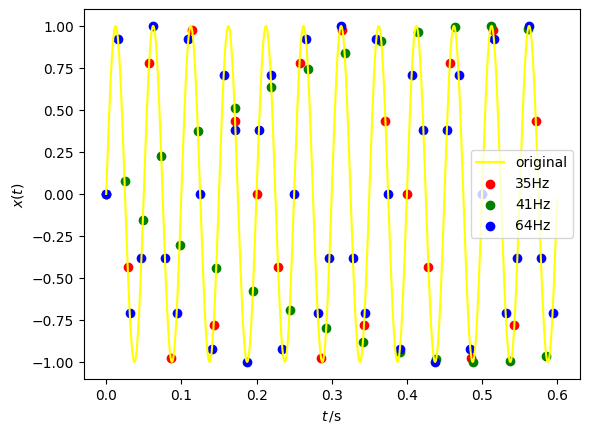

In [55]:
stop = .6
t1 = np.arange(0, stop, 1 / f_samp)  # Abtast-Intervall definieren
x1 = get_discrete_signal(t1)
plt.plot(t1, x1, color="yellow", label="original")
x_35 = plot_discrete(35, stop, color="red");
x_41 = plot_discrete(41, stop, color="green");
x_64 = plot_discrete(64, stop, color="blue");
plt.xlabel("$t \, / \\rm{s}$")
plt.ylabel("$x(t)$")
plt.legend();
plt.show();

b) Amplitudenspektrum 

Stellen Sie die Amplitudenspektren der drei abgetasteten Signale dar und diskutieren Sie die Ergebnisse! Welchen Einfluss hat die Abtastrate auf das Spektrum? 

*Hinweis*: Für die Schnelle Fourier-Transformation (FFT) stellt SciPy die Funktionen [`scipy.fft.fft()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html) und [`scipy.fft.fftfreq()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html) bereit.

In [56]:
from typing import List

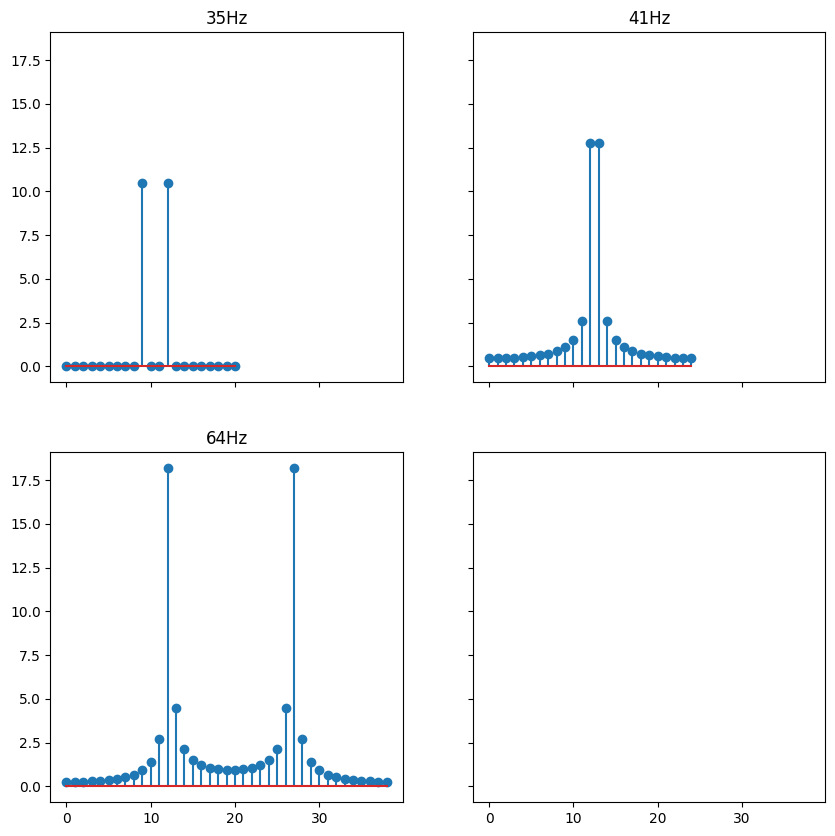

In [57]:
fft_x_35: np.ndarray = fft(x_35);
fft_x_41: np.ndarray = fft(x_41);
fft_x_64: np.ndarray = fft(x_64);

#plt.subplot(2, 2, 1);
axes: List[List[plt.Axes]] = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)[1];
axes[0][0].stem(np.abs(fft_x_35));
axes[0][0].set_title("35Hz");
#plt.subplot(2, 2, 2);
axes[0][1].stem(np.abs(fft_x_41));
axes[0][1].set_title("41Hz");
#plt.subplot(2, 2, 3);
axes[1][0].stem(np.abs(fft_x_64));
axes[1][0].set_title("64Hz");
plt.show();

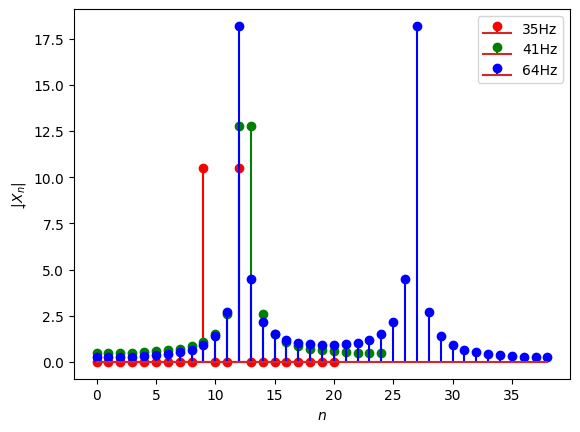

In [58]:
plt.stem(np.abs(fft_x_35), label="35Hz", linefmt="red",   markerfmt="red");
plt.stem(np.abs(fft_x_41), label="41Hz", linefmt="green", markerfmt="green");
plt.stem(np.abs(fft_x_64), label="64Hz", linefmt="blue",  markerfmt="blue");
plt.xlabel("$n$");
plt.ylabel(r"$| \underbar{X}_n |$");
plt.legend();
plt.show();

c) Länge des Signals

Wiederholen Sie die Aufgabenteile a) und b) mit den folgenden Zeitintervallen:
* 0 bis 1 s
* 0 bis 1.6 s

Diskutieren Sie die Ergebnisse! Welchen Einfluss hat die Länge des Beobachtungsintervalls auf das Amplitudenspektrum? Welche Rolle spielt der hierbei sogenannte Leck-Effekt?


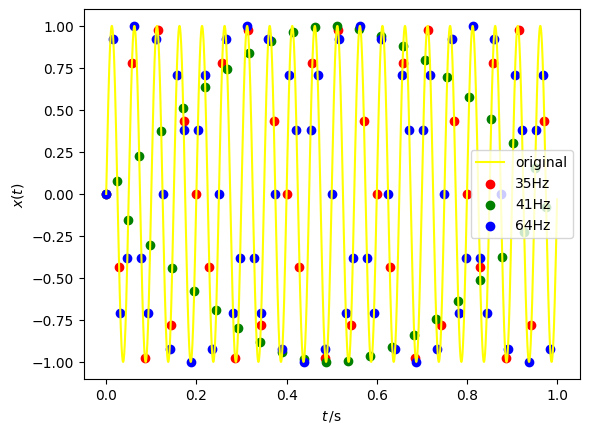

In [59]:
stop = 1;

t2 = np.arange(0, stop, 1 / f_samp)  # Abtast-Intervall definieren
x2 = get_discrete_signal(t2)
plt.plot(t2, x2, color="yellow", label="original")
x_35_2 = plot_discrete(35, stop, color="red");
x_41_2 = plot_discrete(41, stop, color="green");
x_64_2 = plot_discrete(64, stop, color="blue");
plt.xlabel("$t \, / \\rm{s}$")
plt.ylabel("$x(t)$")
plt.legend();
plt.show();

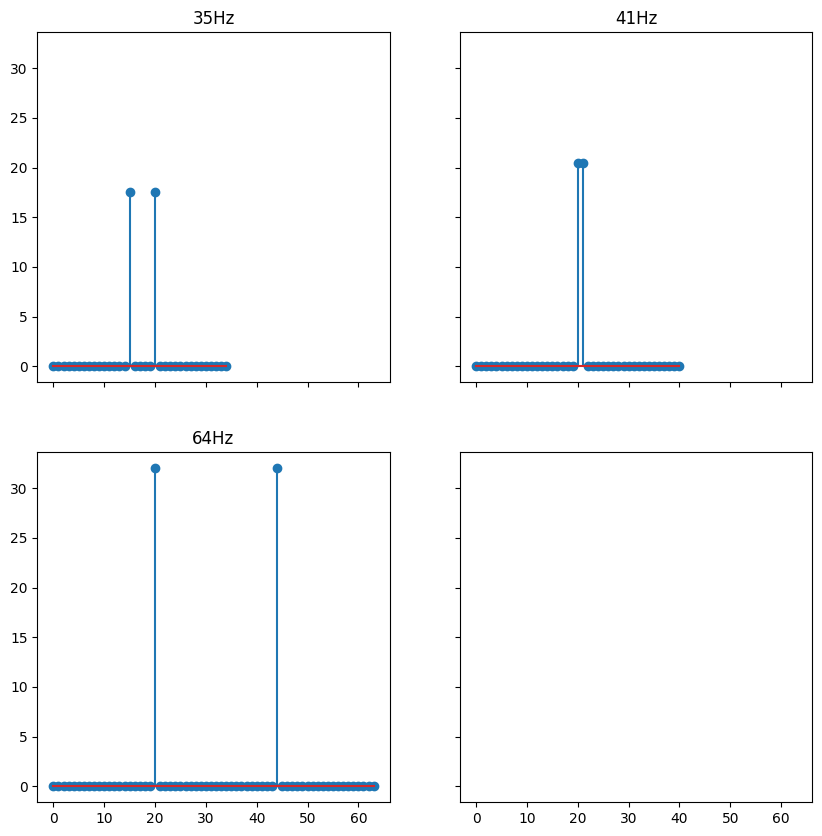

In [60]:
fft_x_35_2: np.ndarray = fft(x_35_2);
fft_x_41_2: np.ndarray = fft(x_41_2);
fft_x_64_2: np.ndarray = fft(x_64_2);

#plt.subplot(2, 2, 1);
axes: List[List[plt.Axes]] = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)[1];
axes[0][0].stem(np.abs(fft_x_35_2));
axes[0][0].set_title("35Hz");
#plt.subplot(2, 2, 2);
axes[0][1].stem(np.abs(fft_x_41_2));
axes[0][1].set_title("41Hz");
#plt.subplot(2, 2, 3);
axes[1][0].stem(np.abs(fft_x_64_2));
axes[1][0].set_title("64Hz");
plt.show();

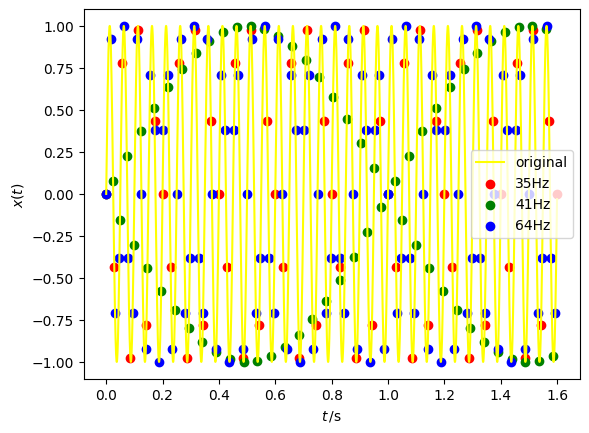

In [61]:
stop = 1.6;

t3 = np.arange(0, stop, 1 / f_samp)  # Abtast-Intervall definieren
x3 = get_discrete_signal(t3)
plt.plot(t3, x3, color="yellow", label="original")
x_35_3 = plot_discrete(35, stop, color="red");
x_41_3 = plot_discrete(41, stop, color="green");
x_64_3 = plot_discrete(64, stop, color="blue");
plt.xlabel("$t \, / \\rm{s}$")
plt.ylabel("$x(t)$")
plt.legend();
plt.show();

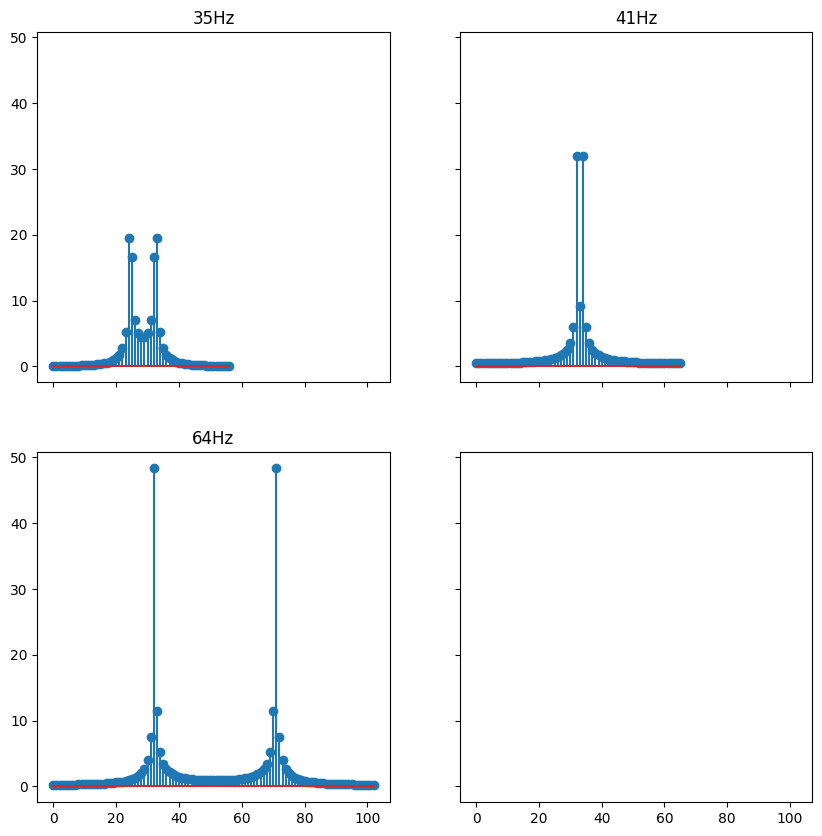

In [62]:
fft_x_35_3: np.ndarray = fft(x_35_3);
fft_x_41_3: np.ndarray = fft(x_41_3);
fft_x_64_3: np.ndarray = fft(x_64_3);

#plt.subplot(2, 2, 1);
axes: List[List[plt.Axes]] = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)[1];
axes[0][0].stem(np.abs(fft_x_35_3));
axes[0][0].set_title("35Hz");
#plt.subplot(2, 2, 2);
axes[0][1].stem(np.abs(fft_x_41_3));
axes[0][1].set_title("41Hz");
#plt.subplot(2, 2, 3);
axes[1][0].stem(np.abs(fft_x_64_3));
axes[1][0].set_title("64Hz");
plt.show();

d) Signalrekonstruktion

Nutzen Sie die drei diskretisierten Signale aus Aufgabenteil a) um das zeitkontinuierliche Signal zu rekonstruieren! Wählen Sie hierfür eines der zuvor genutzten Beobachtungsintervalle aus. Nutzen Sie für die Signalrekonstruktion:
* eine lineare Interpolation zwischen den abgetasteten Werten (z.B. durch Darstellung als Linien-Diagramm oder mit [```np.interp```](https://numpy.org/doc/stable/reference/generated/numpy.interp.html)),
* die Samplingreihe: $x(t) = \sum_{k=-\infty}^\infty x(k) \ \mathrm{si}(\pi (\frac{t}{{\Delta t}}-k))$

Stellen Sie die rekonstruierten Signale mit einer Abtastfrequenz von 4000 Hz dar (vgl. Diagramm in der Aufgabenstellung)!

Diskutieren Sie die Ergebnisse! Nennen Sie eine mögliche Maßnahme zur Verbesserung der Signalrekonstruktion.

*Zusatzaufgabe:* Warum lässt sich das ursprüngliche Signal in den drei Fällen mit der Samplingreihe nicht exakt rekonstruieren? 

In [63]:
#stop = 1.6; #ist noch gesetzt

t_old_35 = np.arange(0, stop, 1 / 35)
sig_interp_35 = np.interp(t3, t_old_35, x_35_3);

t_old_41 = np.arange(0, stop, 1 / 41)
sig_interp_41 = np.interp(t3, t_old_41, x_41_3);

t_old_64 = np.arange(0, stop, 1 / 64)
sig_interp_64 = np.interp(t3, t_old_64, x_64_3);

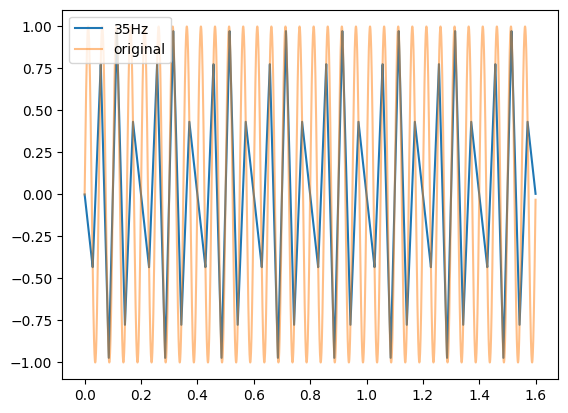

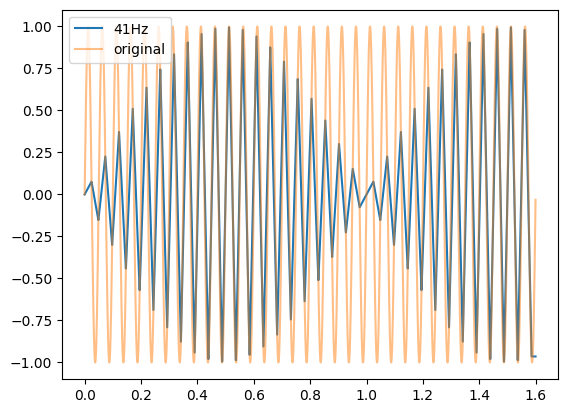

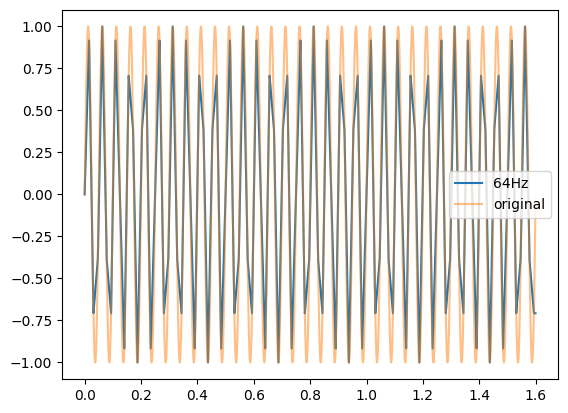

In [64]:
plt.plot(t3, sig_interp_35, label="35Hz");
plt.plot(t3, x3, alpha=.5, label="original");

plt.legend();
plt.show();


plt.plot(t3, sig_interp_41, label="41Hz");
plt.plot(t3, x3, alpha=.5, label="original");

plt.legend();
plt.show();


plt.plot(t3, sig_interp_64, label="64Hz");
plt.plot(t3, x3, alpha=.5, label="original");

plt.legend();
plt.show();

$x(t) = \sum_{k=-\infty}^\infty x(k) \ \mathrm{si}(\pi (\frac{t}{{\Delta t}}-k))$

In [69]:
def sample(x: np.ndarray, t: np.ndarray, delta_t: float):
    x_t = 0;
    for k, x_k in enumerate(x):
        x_t += x_k * np.sinc(t / delta_t - k);

    return x_t;

In [70]:
#stop = 1.6; #ist noch gesetzt

sig_sampled_35 = sample(x_35_3, t3, 1/35);

sig_sampled_41 = sample(x_41_3, t3, 1/41);

sig_sampled_64 = sample(x_64_3, t3, 1/64);

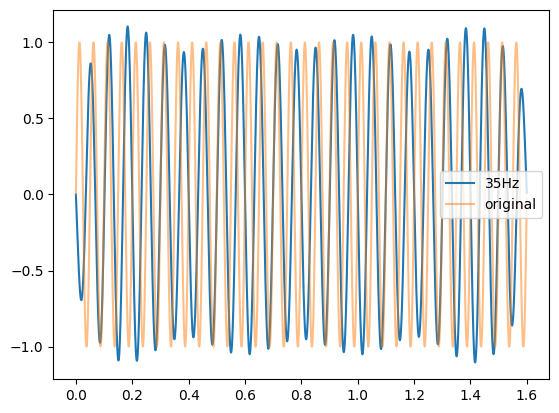

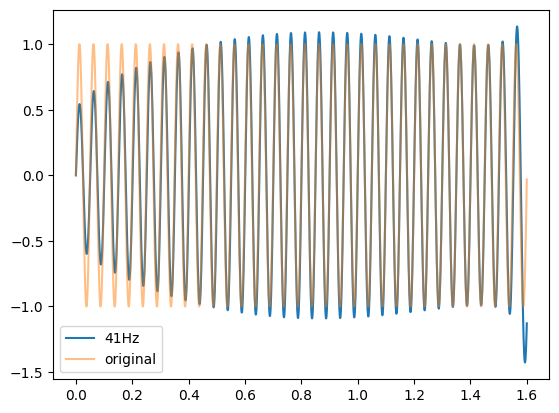

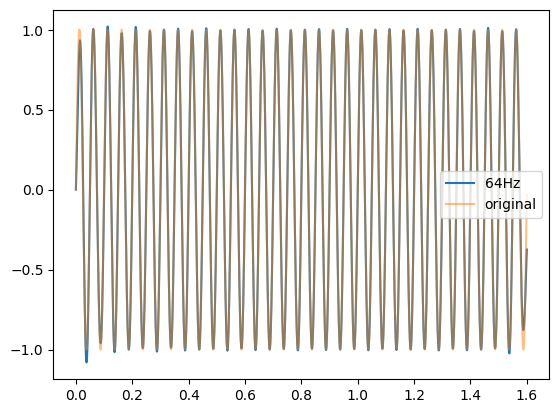

In [71]:
plt.plot(t3, sig_sampled_35, label="35Hz");
plt.plot(t3, x3, alpha=.5, label="original");

plt.legend();
plt.show();


plt.plot(t3, sig_sampled_41, label="41Hz");
plt.plot(t3, x3, alpha=.5, label="original");

plt.legend();
plt.show();


plt.plot(t3, sig_sampled_64, label="64Hz");
plt.plot(t3, x3, alpha=.5, label="original");

plt.legend();
plt.show();